### 0. Importing necessary packages

In [12]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
# datasets in sklearn package
from sklearn.datasets import load_digits
# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1. Loading data, determining samples, attributes, and types of attributes

Use the 'diabetes' data available at https://notebooks.azure.com/chriran/projects/mlcoachprimers-june/html/data/diabetes.csv
Download the data to your local space and read it.

<span style="color:red">**Questions:** </span> 
- Where is the data obtained from?
    **Anonymous patients**
- What does the data capture?
    **Different health metrics and whether the patients has diabetes**
- How many data points are there? 
    **15000 data points**
- What is the dimensionality? **10**
- What type of attributes are present in the dataset? **Numeric values (integer and float) and categorical (0 and 1 for Diabetic)**



In [13]:
diabetes_df = pd.read_csv('diabetes.csv')

In [14]:
type(diabetes_df)

pandas.core.frame.DataFrame

In [15]:
diabetes_df.shape

(15000, 10)

In [16]:
diabetes_df.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [17]:
diabetes_df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [11]:
diabetes_df.tail()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
14995                46           177  33.512468          0.148327   41   
14996                27           168  30.132636          0.862252   38   
14997                43            57  18.690683          0.427049   24   
14998                18           161  19.791645          0.302257   23   
14999                47           512  36.215437          0.147363   34   

       Diabetic  
14995         1  
14996         1  
14997         0  
14998         0  
14999         1

In [12]:
diabetes_df.to_csv('diabetes_data.csv', sep=',')

### 2. Generating summary statistics

Use 'diabetes' data. Do not include PatientID attribute in this analysis. 

<span style="color:red">**Questions:** </span> 
- What are range of values these numeric attributes take? **See maximum and minimum below**
- What different values do categorical attributes take? 
- What are is mean values for each of the attributes?
- What are is variance for each of the attributes? **See below**
- How is the data distributed for each of these attributes? **See dist plots**

In [13]:
diabetes_df.describe()

PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000     14.000000     18.200512          0.078044   
25%           15.000000     39.000000     21.259887          0.137743   
50%           31.000000     83.000000     31.767940          0.200297   
75%           41.000000    195.000000     39.259692          0.616285   
max           93.000000    799.000000     56.034628          2.301594   

                Age      Diabetic  
count  15000.000000  15000.000000  
mean      30.137733      0.333333  
std       12.089703      0.471420  
min       21.000000      0.000000  
25%       22.000000      0.000000  
50%       24.000000      0.000000  
75%       35.000000      1.000000  
max       77.000000      1.000000

In [17]:
from pandas.api.types import is_numeric_dtype

for col in diabetes_df.columns[1:]:
    if is_numeric_dtype(diabetes_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % diabetes_df[col].mean())
        print('\t Standard deviation = %.2f' % diabetes_df[col].std())
        print('\t Variance = %.2f' % diabetes_df[col].var())
        print('\t Minimum = %.2f' % diabetes_df[col].min())
        print('\t Maximum = %.2f' % diabetes_df[col].max())

Pregnancies:
	 Mean = 3.22
	 Standard deviation = 3.39
	 Variance = 11.50
	 Minimum = 0.00
	 Maximum = 14.00
PlasmaGlucose:
	 Mean = 107.86
	 Standard deviation = 31.98
	 Variance = 1022.85
	 Minimum = 44.00
	 Maximum = 192.00
DiastolicBloodPressure:
	 Mean = 71.22
	 Standard deviation = 16.76
	 Variance = 280.85
	 Minimum = 24.00
	 Maximum = 117.00
TricepsThickness:
	 Mean = 28.81
	 Standard deviation = 14.56
	 Variance = 211.87
	 Minimum = 7.00
	 Maximum = 93.00
SerumInsulin:
	 Mean = 137.85
	 Standard deviation = 133.07
	 Variance = 17707.16
	 Minimum = 14.00
	 Maximum = 799.00
BMI:
	 Mean = 31.51
	 Standard deviation = 9.76
	 Variance = 95.24
	 Minimum = 18.20
	 Maximum = 56.03
DiabetesPedigree:
	 Mean = 0.40
	 Standard deviation = 0.38
	 Variance = 0.14
	 Minimum = 0.08
	 Maximum = 2.30
Age:
	 Mean = 30.14
	 Standard deviation = 12.09
	 Variance = 146.16
	 Minimum = 21.00
	 Maximum = 77.00
Diabetic:
	 Mean = 0.33
	 Standard deviation = 0.47
	 Variance = 0.22
	 Minimum = 0.00
	 Max

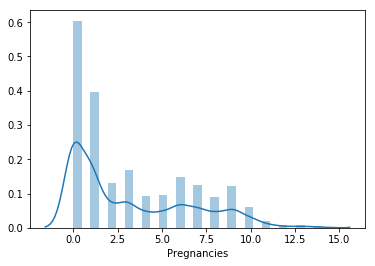

In [37]:
sns.distplot(diabetes_df['Pregnancies']);

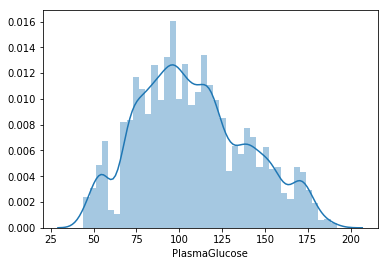

In [38]:
sns.distplot(diabetes_df['PlasmaGlucose']);

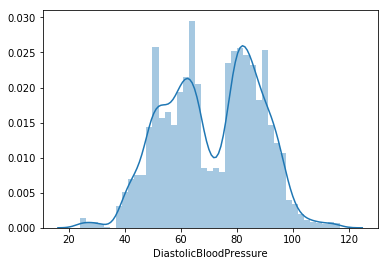

In [39]:
sns.distplot(diabetes_df['DiastolicBloodPressure']);

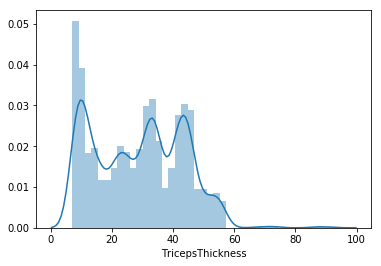

In [40]:
sns.distplot(diabetes_df['TricepsThickness']);

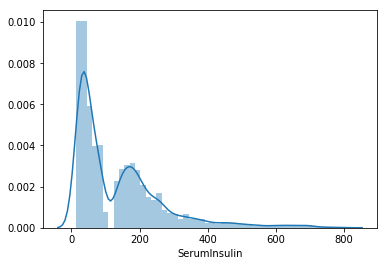

In [41]:
sns.distplot(diabetes_df['SerumInsulin']);

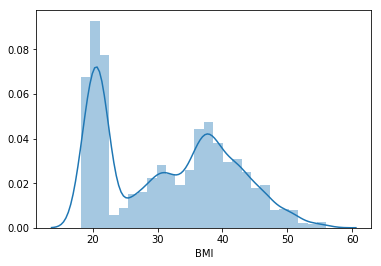

In [42]:
sns.distplot(diabetes_df['BMI']);

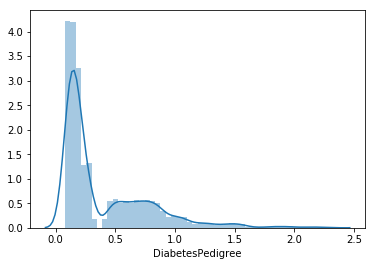

In [43]:
sns.distplot(diabetes_df['DiabetesPedigree']);

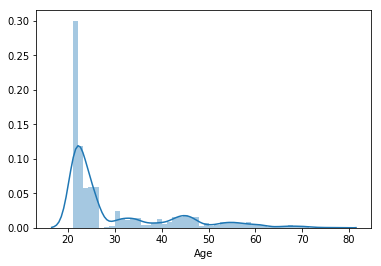

In [44]:
sns.distplot(diabetes_df['Age']);

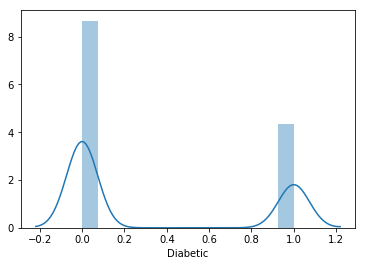

In [45]:
sns.distplot(diabetes_df['Diabetic']);

### 3. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'diabetes' data. Do not include PatientID and Diabetic attribute in this analysis. 


<span style="color:red">**Questions:** </span> 
- What is the covariance matrix? **See below**
- Which pairs of attributes co-vary?
- Which pairs of attributes have low covariance?
**All attributes with Diabetes Pedigree**
- Which pairs of attributes are highly correlated? 
**Serum Insulin & Pregnacies, Serum Insulin & Plasma Glucose, Serum Insulin & Diastolic blood pressure, Serum Insulin & Triceps Thickness, Serum Insulin & BMI, Serum Insulin & Age**
- Which pairs of attributes are uncorrelated? 
**Tricep Thickness and Diabetes Pedigree**
- What information do you gain from a correlation matrix, but not from a covariance matrix?

In [57]:
print('Covariance:')
# diabetes_df.cov()
diabetes_df.loc[:,'Pregnancies':'Age'].cov()

Covariance:


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Pregnancies               11.499018       5.910866                2.473685   
PlasmaGlucose              5.910866    1022.846703                3.865442   
DiastolicBloodPressure     2.473685       3.865442              280.854563   
TricepsThickness           3.139439      12.615418                2.709158   
SerumInsulin              47.148411     142.760019               50.507463   
BMI                        2.858772       6.446154                2.596033   
DiabetesPedigree           0.069515       0.109479                0.089299   
Age                        5.615382      15.026716                8.374298   

                        TricepsThickness  SerumInsulin        BMI  \
Pregnancies                     3.139439     47.148411   2.858772   
PlasmaGlucose                  12.615418    142.760019   6.446154   
DiastolicBloodPressure          2.709158     50.507463   2.596033   
TricepsThickness              211.868862     57.502064   3.515076   
SerumInsulin                   57.502064  17707.159679  66.519054   
BMI                             3.515076     66.519054  95.238076   
DiabetesPedigree               -0.005232      2.329728   0.106477   
Age                            10.801805    141.581472   7.422307   

                        DiabetesPedigree         Age  
Pregnancies                     0.069515    5.615382  
PlasmaGlucose                   0.109479   15.026716  
DiastolicBloodPressure          0.089299    8.374298  
TricepsThickness               -0.005232   10.801805  
SerumInsulin                    2.329728  141.581472  
BMI                             0.106477    7.422307  
DiabetesPedigree                0.142841    0.254201  
Age                             0.254201  146.160907

In [58]:
print('Correlation:')
# diabetes_df.corr()
diabetes_df.loc[:,'Pregnancies':'Age'].corr()

Correlation:


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Pregnancies                1.000000       0.054502                0.043528   
PlasmaGlucose              0.054502       1.000000                0.007212   
DiastolicBloodPressure     0.043528       0.007212                1.000000   
TricepsThickness           0.063605       0.027100                0.011106   
SerumInsulin               0.104487       0.033545                0.022649   
BMI                        0.086386       0.020653                0.015873   
DiabetesPedigree           0.054240       0.009057                0.014099   
Age                        0.136972       0.038864                0.041333   

                        TricepsThickness  SerumInsulin       BMI  \
Pregnancies                     0.063605      0.104487  0.086386   
PlasmaGlucose                   0.027100      0.033545  0.020653   
DiastolicBloodPressure          0.011106      0.022649  0.015873   
TricepsThickness                1.000000      0.029688  0.024745   
SerumInsulin                    0.029688      1.000000  0.051223   
BMI                             0.024745      0.051223  1.000000   
DiabetesPedigree               -0.000951      0.046324  0.028868   
Age                             0.061383      0.088007  0.062910   

                        DiabetesPedigree       Age  
Pregnancies                     0.054240  0.136972  
PlasmaGlucose                   0.009057  0.038864  
DiastolicBloodPressure          0.014099  0.041333  
TricepsThickness               -0.000951  0.061383  
SerumInsulin                    0.046324  0.088007  
BMI                             0.028868  0.062910  
DiabetesPedigree                1.000000  0.055633  
Age                             0.055633  1.000000

### 4. Dimensionality Reduction: Feature Selection

**Assumption:** Assume that your goal is to cluster the data to identify the diagnosis 'Diabetic'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Diabetic' attribute will be hidden from the clustering algorithm.

<span style="color:red">**Questions:** </span> 
- If you are allowed to select only one (out of the four) feature, which feature would be highly useful for the clustering task. Provide a reason.
**Serum Insulin**
- If you are allowed to select only two (out of the four) feature, which feature would be highly useful for the clustering task. Provide a reason.
- Note that in real-world problems ground-truth will not be available to select the features, how do you approach the feature selection problem in that case?

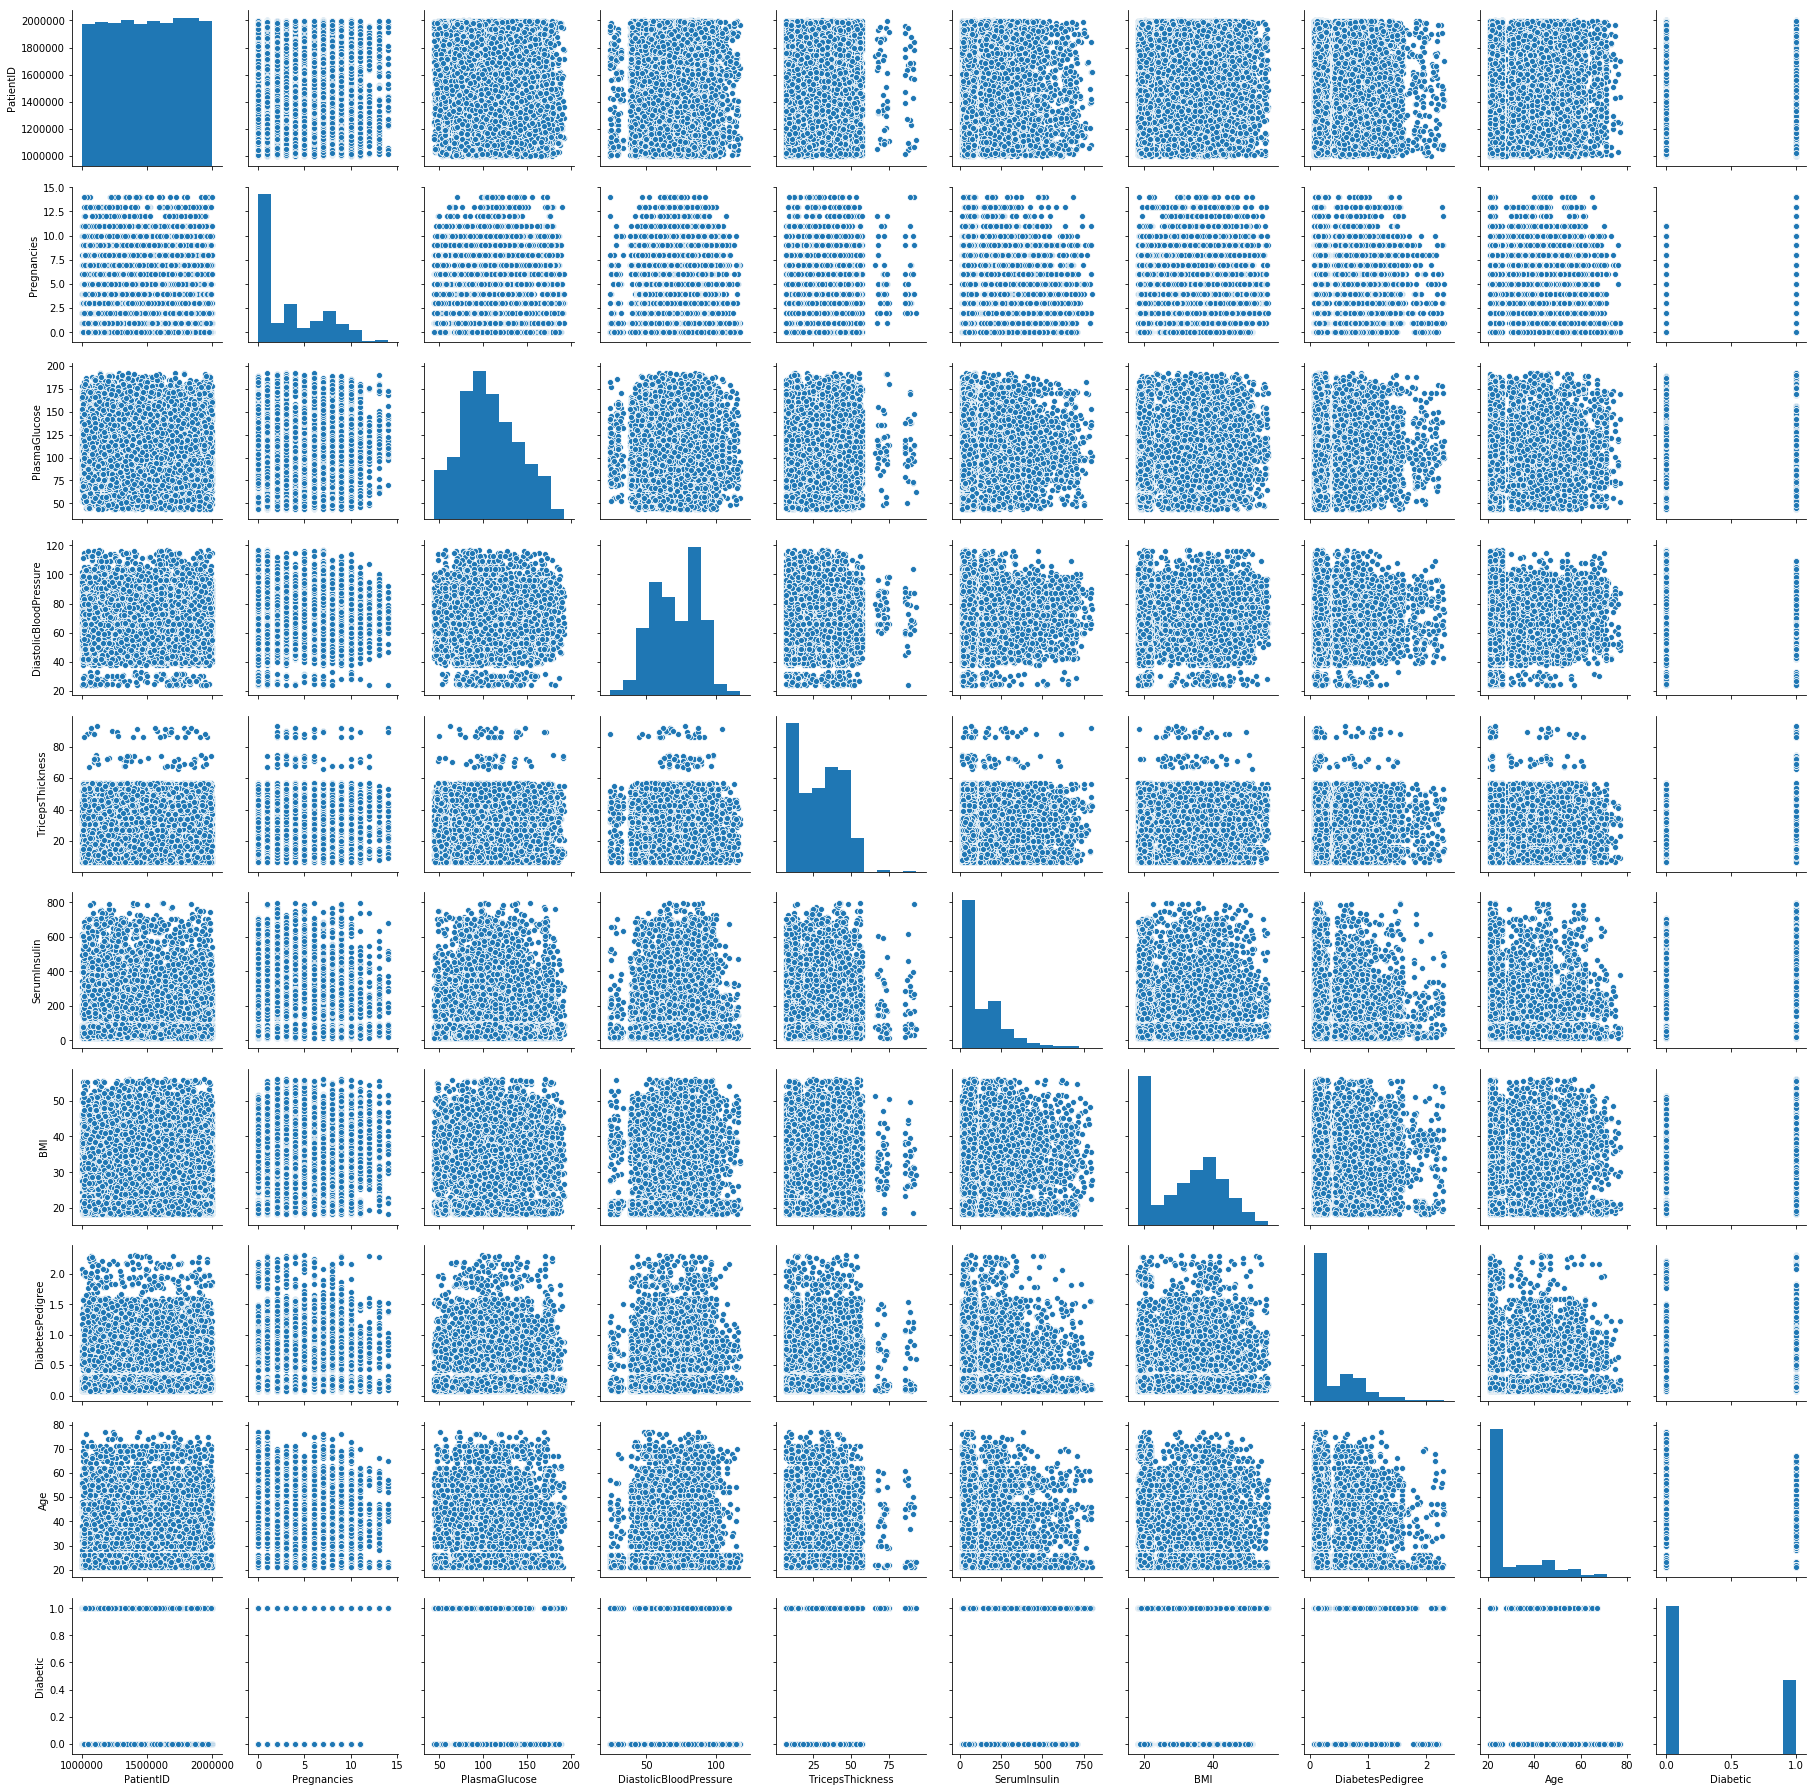

In [65]:
sns.pairplot(diabetes_df)

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


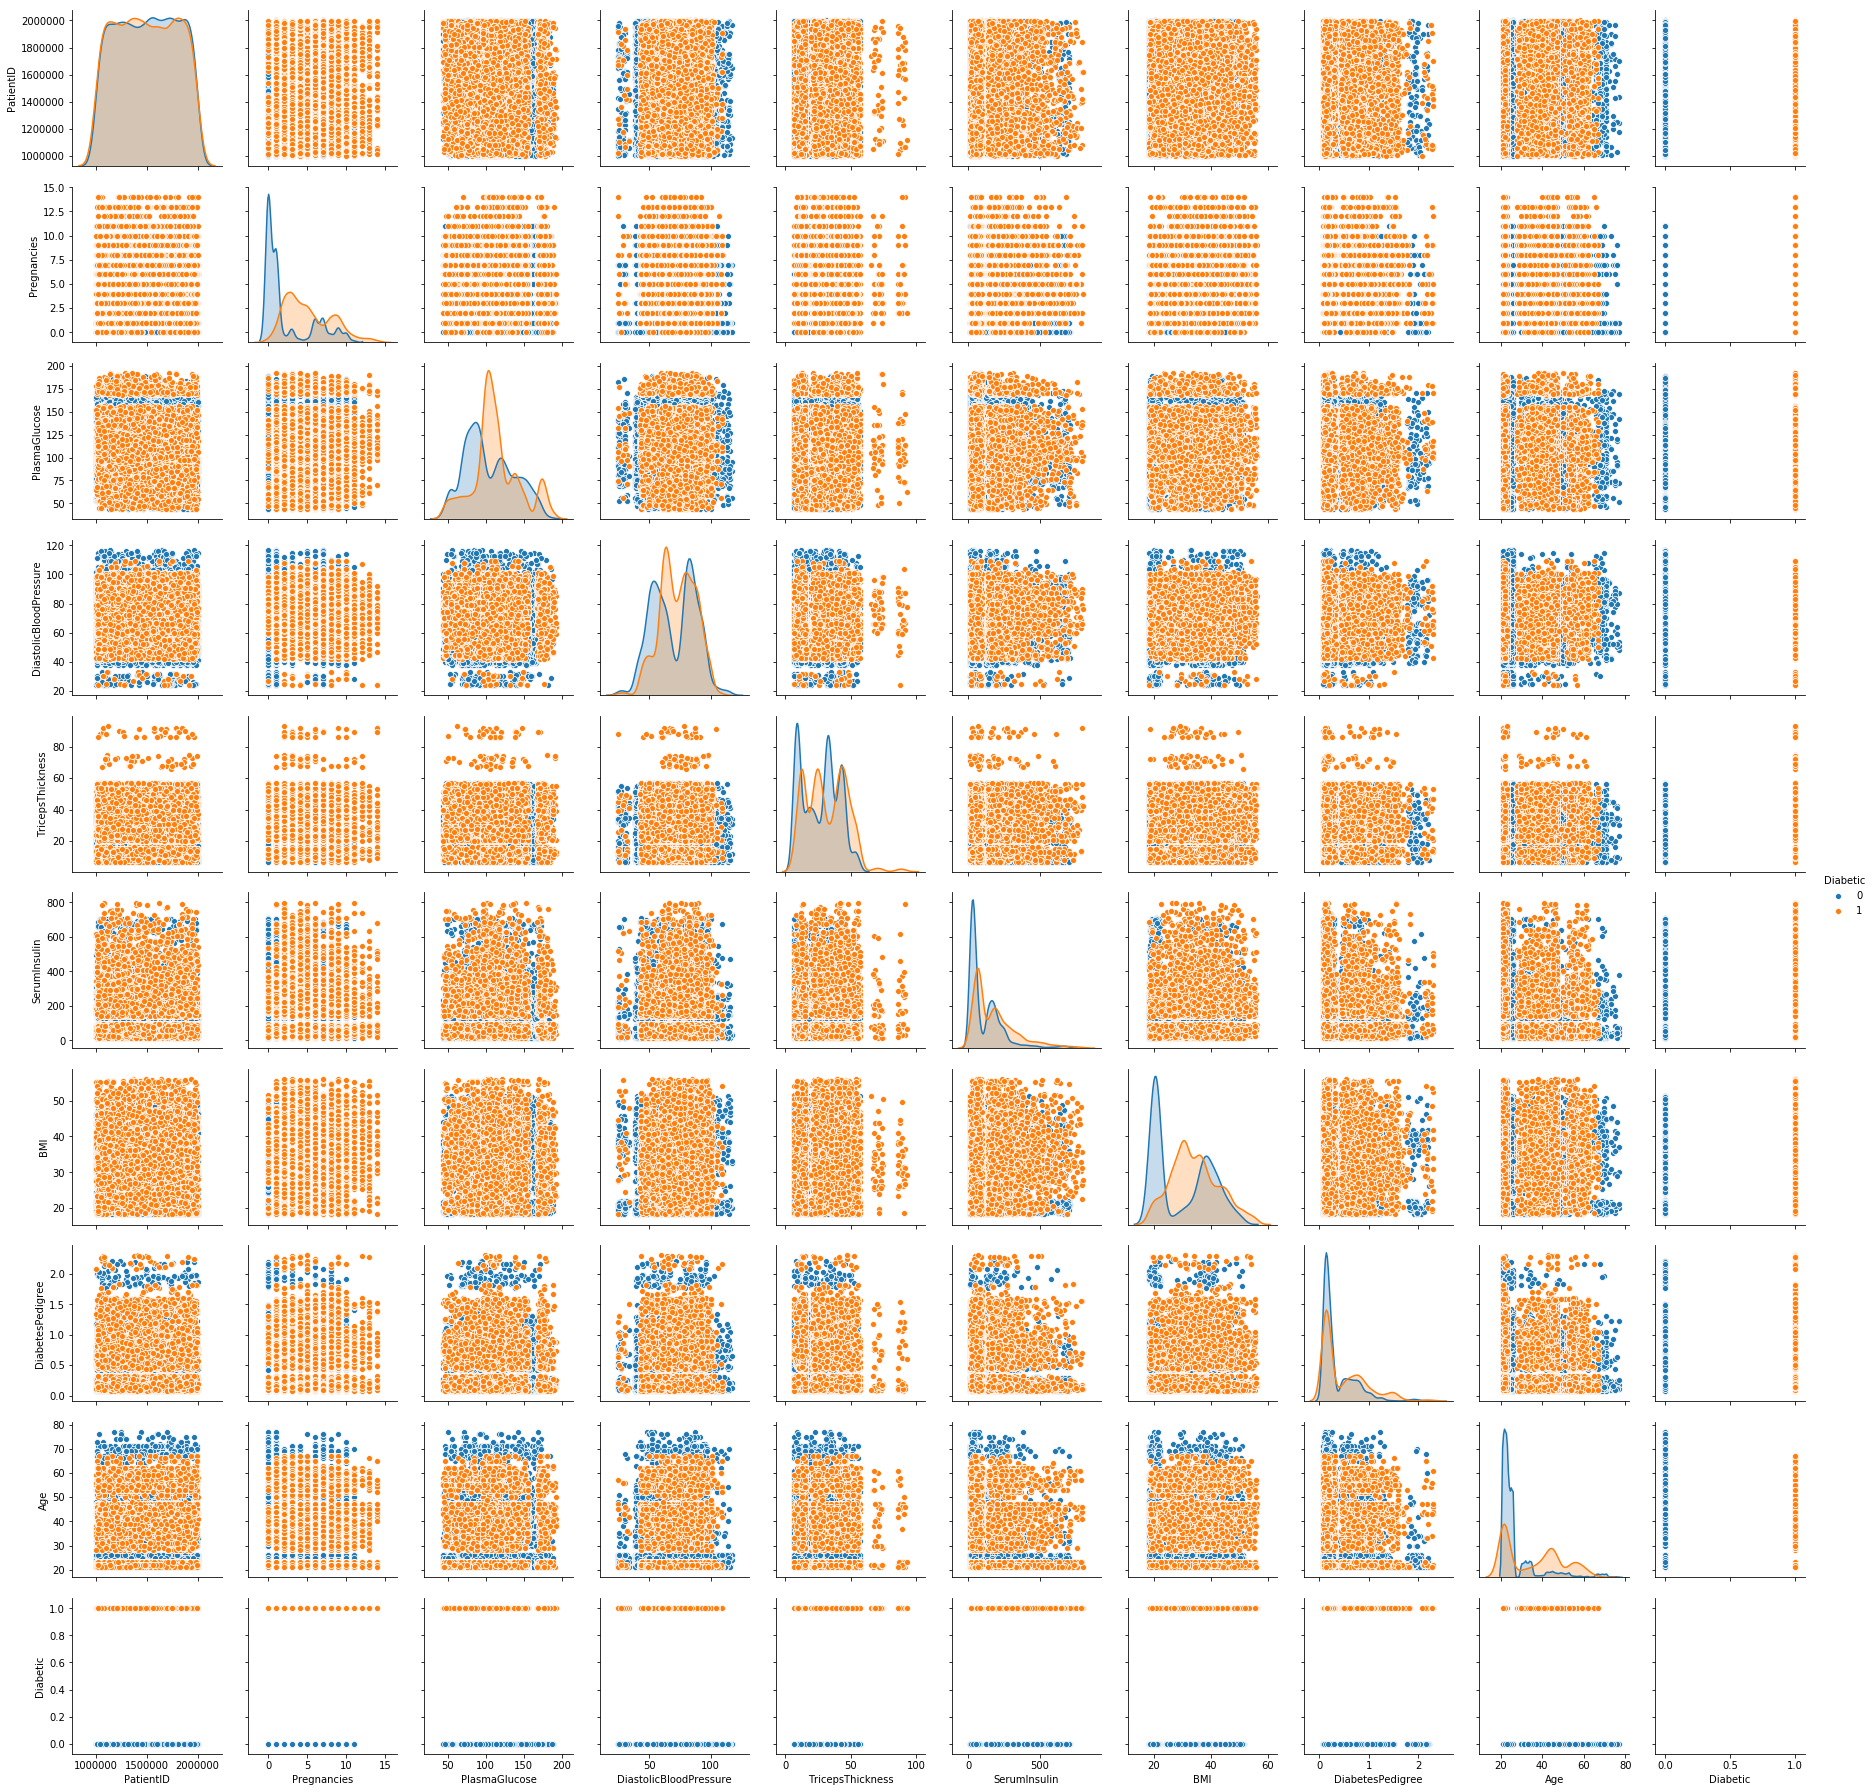

In [60]:
sns.pairplot(diabetes_df, hue="Diabetic")

### 5. Dimensionality Reduction: PCA

Using diabetes data (exclude PatientID and Diabetic attributes), perform PCA, select 2 components, and project the data. You may use the PCA function from the sklearn package. Plot the projected data and comment if the data for the two groups (Diabetic=0 and Diabetic=1) of Diabetic attribute are  well seggreated in the principal components space.

Steps involved in PCA
1. Input data: set of points in $R^d$
2. Compute covariance matrix $\Sigma$ (a $d \times d$ matrix)
3. Compute Eigenvectors of $\Sigma$
4. Select $r$ Eigenvectors (based on a parameter or based on variance explained) corresponding to the highest eigenvalues
5. Project data on to the new $r$ dimensional space

In [64]:
digits = load_digits()
digits.data.shape

(1797, 64)

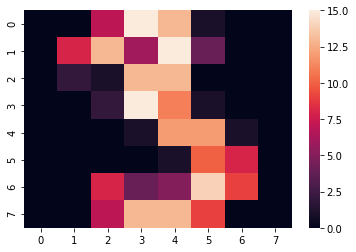

In [66]:
sns.heatmap(np.reshape(digits.data[3,:],[8,8]))

In [76]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)   

(1797, 64)
(1797, 2)


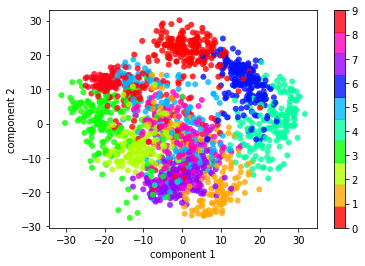

In [77]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 6. Singular Value Decomposition

Using the following matrix A, write your own SVD function to factorize the matrix into U,S, and V. You may use the PCA function that is available in the sklearn package.

In [6]:
A = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 2, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 1, 0, 2, 2]])

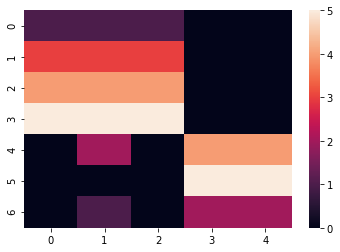

In [10]:
sns.heatmap(A)

In [7]:
U, S, V = svd(A, full_matrices = False)

Text(0,0.5,'Variance')

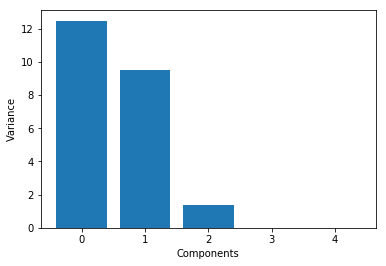

In [8]:
plt.bar(np.arange(5),S)
plt.xlabel('Components')
plt.ylabel('Variance')

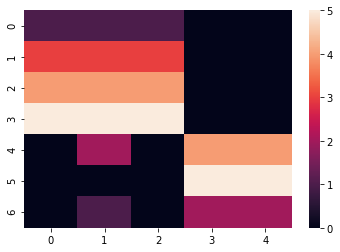

In [9]:
sns.heatmap(np.matmul(np.matmul(U,np.diag(S)), V))

### 7. Linear Discriminant Analysis

Using diabetes data (exclude PatientID attribute), perform LDA.  You may use the LinearDiscriminantAnalysis function from the sklearn package. Plot the data and comment if a good separation between points that belong to Diabetic=0 and Diabetic=1 has been achieved.

Steps involved in LDA
1. Input data: set of points in $R^d$
2. Compute mean vectors $\mu_1$ and $\mu_2$
3. Compute between class scatter matrix $S_B$
4. Compute within class scatter matrix $S_W$
5. Compute the matrix $S_W^{-1}S_B$
4. Compute the first eigenvector ($v_1$) of the matrix $S_W^{-1}S_B$
5. Project data on to this eigenvector $Xv_1$

In [82]:
X = diabetes_df.loc[:,'Pregnancies':].values[:,0:4]
y = diabetes_df.loc[:,'Pregnancies':].values[:,4] 

In [83]:
X = X[0:100,:]

In [84]:
y = y[0:100]

In [85]:
np.shape(X)

(100, 4)

In [86]:
y

array([ 23.,  36.,  35., 304.,  35., 253., 227.,  36.,  24.,  42.,  58.,
        36.,  70.,  44., 179.,  61.,  51., 226., 164., 289., 324., 276.,
       165., 266., 146.,  40.,  14., 428.,  16.,  16., 541.,  46.,  67.,
        46., 469.,  31.,  79.,  21.,  70., 232.,  66., 190.,  48., 471.,
       323.,  83., 159.,  24.,  24., 243., 230.,  59., 129., 302.,  34.,
        23.,  46.,  29.,  29., 128.,  30.,  71., 479.,  68.,  62., 178.,
       170., 250.,  22.,  27., 250.,  51.,  35.,  44.,  95.,  34.,  64.,
        48.,  60.,  33.,  29.,  40.,  27.,  14.,  28.,  45., 193., 593.,
        48.,  25.,  63., 203., 306.,  36., 665., 144.,  15., 125., 195.,
        59.])

In [87]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(X, y).transform(X)

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [ ]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)

In [30]:
pca = PCA(n_components=2)
X_r2 = pca.fit(X).transform(X)

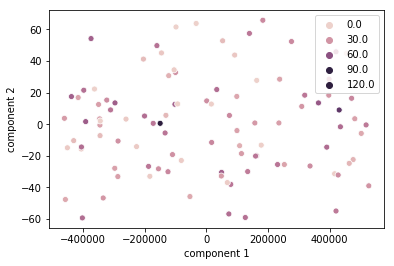

In [31]:
fig=sns.scatterplot(x=X_r2[:,0],y=X_r2[:,1],hue=y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show(fig)

**I think we have a good separation between Diabetic = 0 and Diabetic = 1**